In [1]:
import mplhep
import numpy as np
import uproot
from matplotlib import pyplot as plt

In [2]:
my_file = uproot.open('https://cern.ch/starterkit/data/advanced-python-2018/real_data.root')

my_file.keys()

['DecayTree;2', 'DecayTree;1']

In [3]:
tree = my_file['DecayTree']
# Get a numpy array containing the J/Ψ mass
tree['Jpsi_M'].array(library='np')

array([3.101106  , 3.1071159 , 3.08600438, ..., 3.00478927, 2.77311478,
       2.7698744 ])

In [4]:
# Load data as a pandas DataFrame
data_df = tree.arrays(library='pd')
my_file.close()  # usually, it's better to open the file with a "with" statement -> needs no closing

# Show the first 5 lines of the DataFrame
data_df.head()

,Jpsi_PE,Jpsi_PX,Jpsi_PY,Jpsi_PZ,Jpsi_PT,Jpsi_P,Jpsi_M,mum_PT,mum_PX,mum_PY,...,mup_PZ,mup_IP,mup_eta,mup_M,mup_PE,nTracks,mum_ProbNNmu,mum_ProbNNpi,mup_ProbNNmu,mup_ProbNNpi
0,188.630181,-1.700534,-9.131937,188.375806,9.288923,188.604688,3.101106,4.376341,-2.246101,-3.755981,...,99.674146,119.018213,3.608728,0.105658,99.820565,149.0,0.999983,0.836058,0.999994,0.244674
1,52.385685,1.816164,5.595537,51.961499,5.882897,52.293459,3.107116,1.735741,1.552217,0.776801,...,41.621295,210.293355,2.851094,0.105658,41.900278,125.0,0.998874,0.264369,0.999999,0.391294
2,52.068478,2.552368,2.817129,51.837748,3.801420,51.976946,3.086004,1.110952,0.179505,1.096355,...,20.279673,38.272015,2.632559,0.105658,20.490677,371.0,0.538509,0.313881,0.882305,0.961390
3,78.399724,-2.833082,-0.818953,78.283360,2.949075,78.338889,3.087923,2.571993,-2.028028,-1.581850,...,9.020064,134.767864,2.792800,0.105658,9.088611,136.0,0.896250,0.792830,0.999992,0.724581
4,83.900727,-5.065507,-3.457333,83.618226,6.132904,83.842831,3.116368,3.698279,-3.220143,-1.818777,...,16.851730,2926.081975,2.619576,0.105658,17.031800,71.0,0.998548,0.270670,0.999987,0.921856


In [5]:
data_df.columns

Index(['Jpsi_PE', 'Jpsi_PX', 'Jpsi_PY', 'Jpsi_PZ', 'Jpsi_PT', 'Jpsi_P',
       'Jpsi_M', 'mum_PT', 'mum_PX', 'mum_PY', 'mum_PZ', 'mum_IP', 'mum_eta',
       'mum_M', 'mum_PE', 'mup_PT', 'mup_PX', 'mup_PY', 'mup_PZ', 'mup_IP',
       'mup_eta', 'mup_M', 'mup_PE', 'nTracks', 'mum_ProbNNmu', 'mum_ProbNNpi',
       'mup_ProbNNmu', 'mup_ProbNNpi'],
      dtype='object')

Text(0.5, 0, 'Jpsi mass')

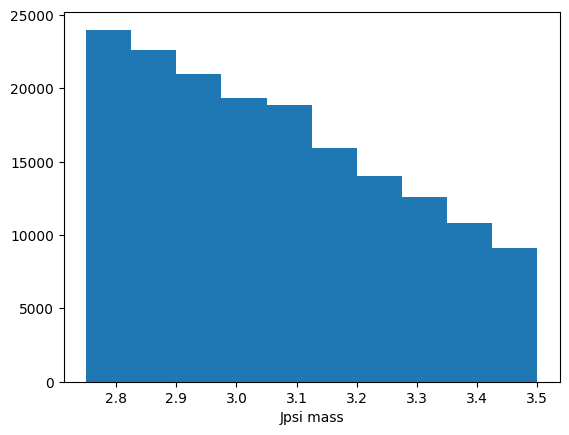

In [6]:
# Start with a basic histogram
plt.hist(data_df['Jpsi_M'])
plt.xlabel('Jpsi mass')

In [7]:
plt.style.use(mplhep.style.CMS)

Text(1, 0, 'Jpsi mass')

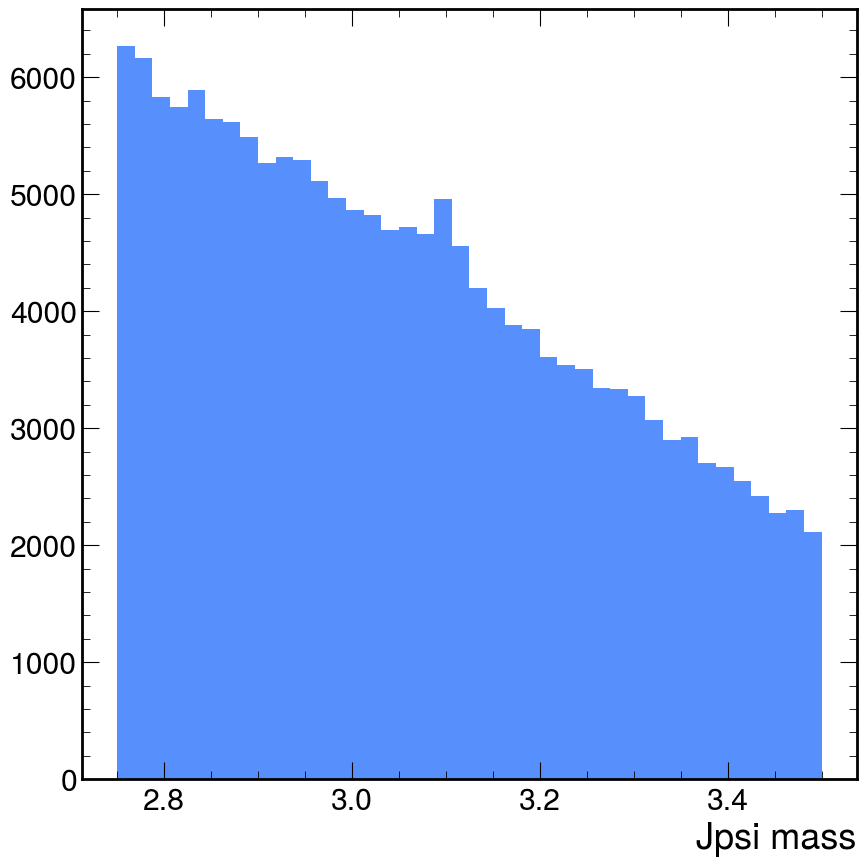

In [8]:
# plotting again
plt.hist(data_df['Jpsi_M'], bins=40)
plt.xlabel('Jpsi mass')

Text(1, 0, 'Jpsi mass')

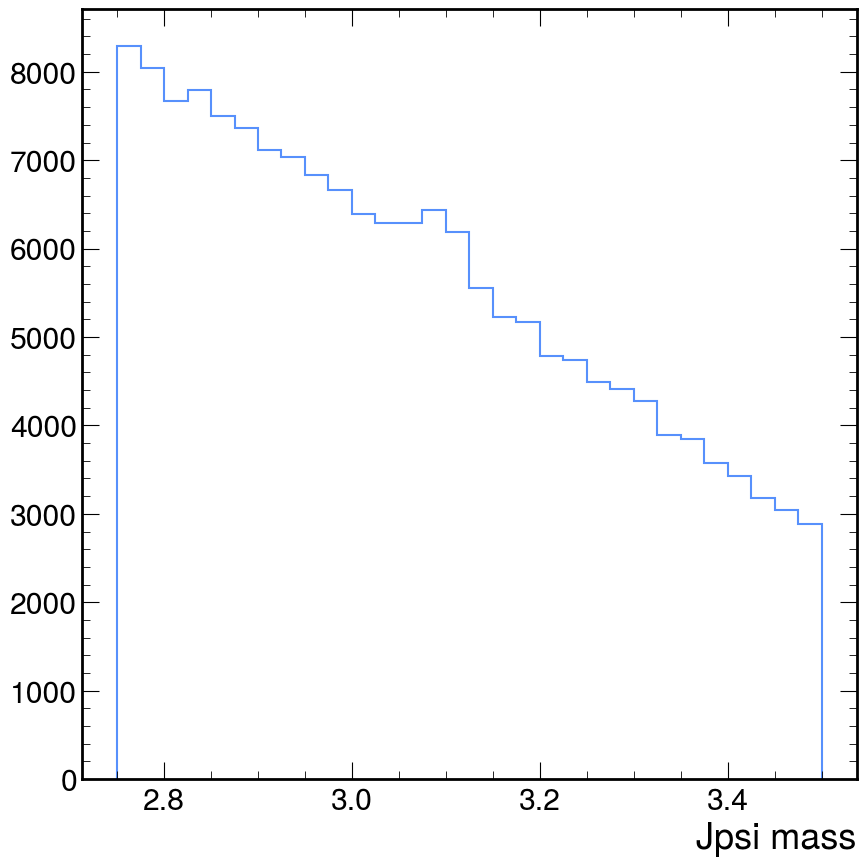

In [9]:
# And similar with mplhep
mplhep.histplot(*np.histogram(data_df['Jpsi_M'], bins=30))
plt.xlabel('Jpsi mass')

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

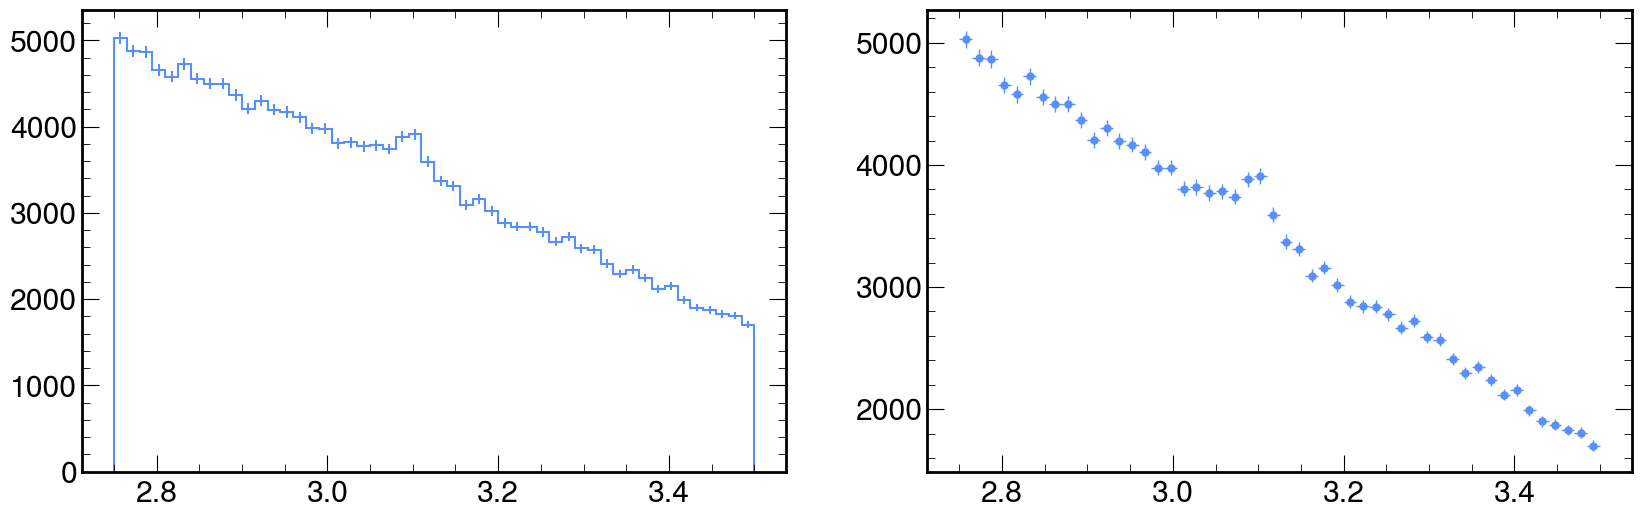

In [10]:
h, bins = np.histogram(data_df['Jpsi_M'], bins=50)  # TRY OUT: change the binning
plt.subplots(1,2,figsize=(20, 6))
plt.subplot(1, 2, 1)
mplhep.histplot(h, bins, yerr=True)  # error can also be array
plt.subplot(1, 2, 2)
half_binwidths = (bins[1] - bins[0]) / 2
mplhep.histplot(h, bins, histtype='errorbar', yerr=True, xerr=half_binwidths)

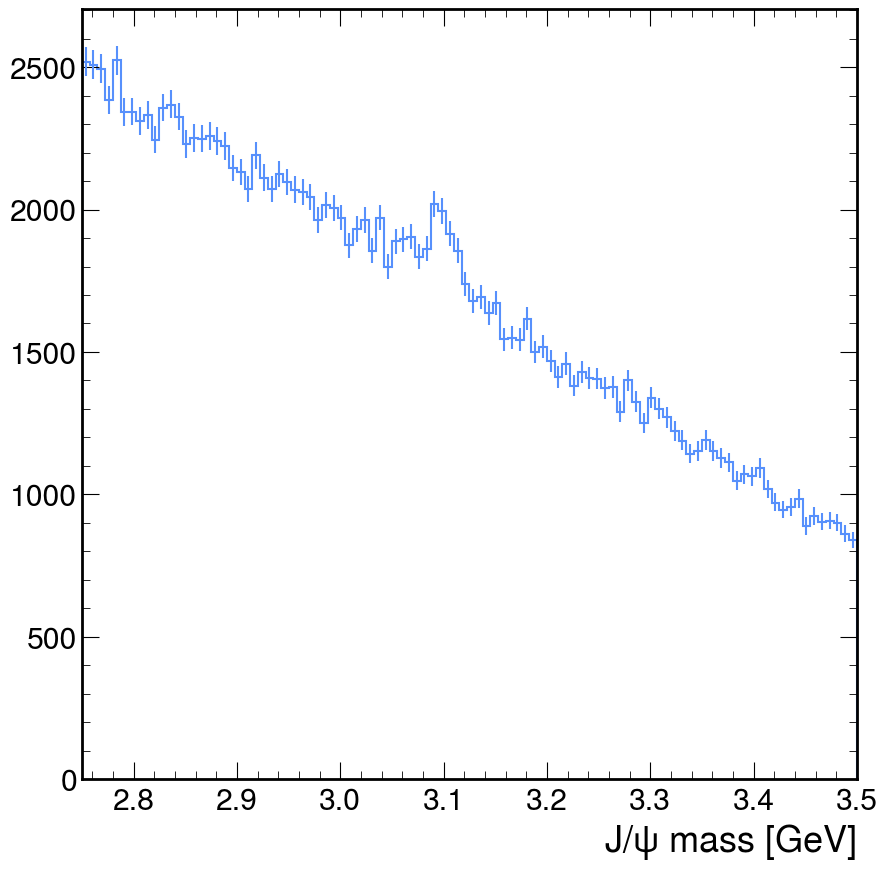

In [11]:
def plot_mass(df):
    h, bins = np.histogram(df['Jpsi_M'], bins=100, range=[2.75, 3.5])
    mplhep.histplot(h, bins, yerr=True)  # feel free to adjust
    # You can also use LaTeX in the axis label
    plt.xlabel('$J/\\psi$ mass [GeV]')
    plt.xlim(bins[0], bins[-1])


plot_mass(data_df)

In [12]:
data_df.eval('Jpsi_eta = arctanh(Jpsi_PZ/Jpsi_P)', inplace=True)
data_df.head()['Jpsi_eta']

0    3.703371
1    2.874790
2    3.307233
3    3.972345
4    3.307082
Name: Jpsi_eta, dtype: float64

In [13]:
data_df.eval('mup_P = sqrt(mup_PX**2 + mup_PY**2 + mup_PZ**2)', inplace=True)
data_df.eval('mum_P = sqrt(mum_PX**2 + mum_PY**2 + mum_PZ**2)', inplace=True)
# We can also get multiple columns at the same time
data_df.head()[['mum_P', 'mup_P']]

,mum_P,mup_P
0,88.809553,99.820509
1,10.484875,41.900145
2,31.577624,20.490405
3,69.311033,9.087997
4,66.868844,17.031472


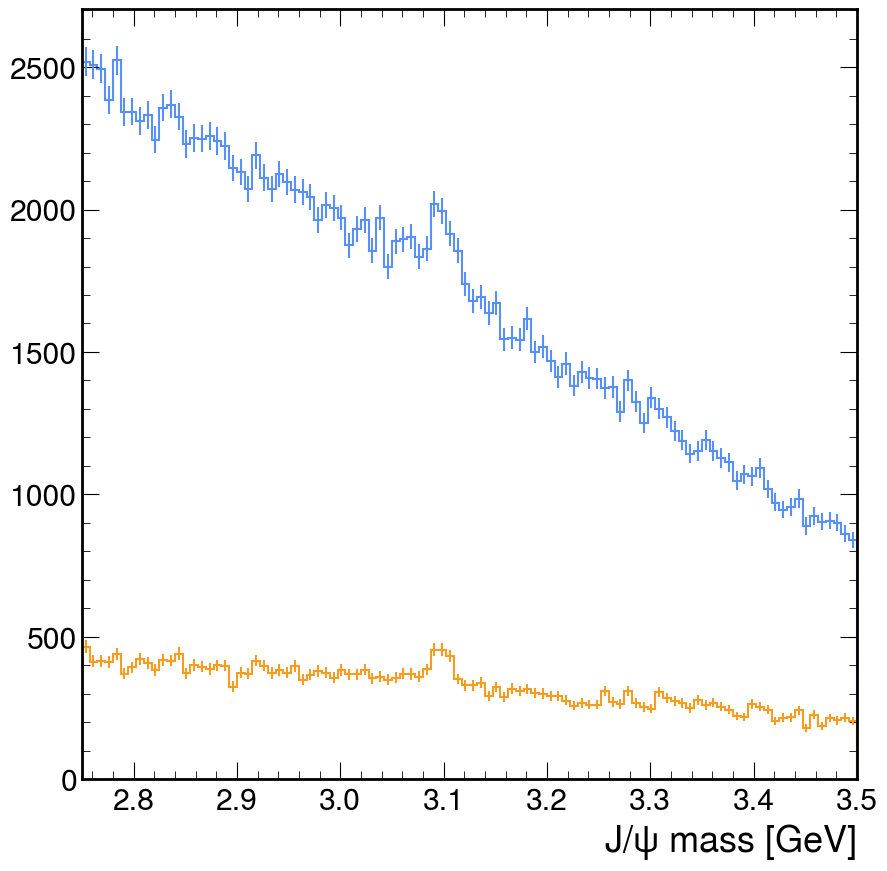

In [14]:
plot_mass(data_df)
data_with_cuts_df = data_df.query('Jpsi_PT > 4')
plot_mass(data_with_cuts_df)

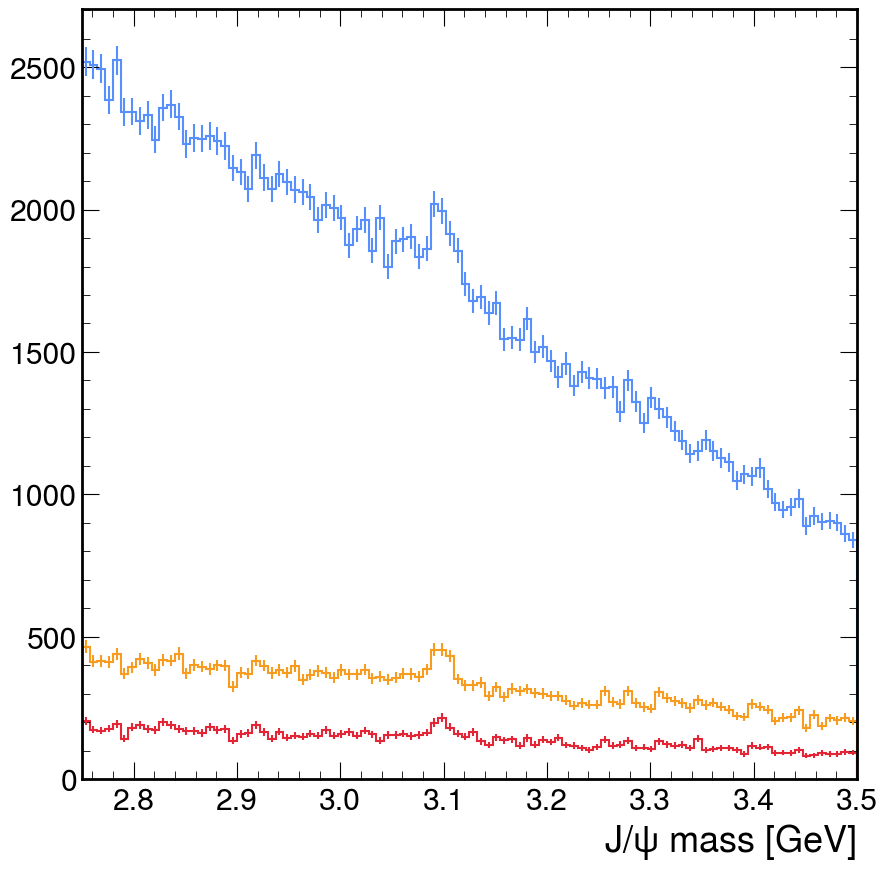

In [15]:
plot_mass(data_df)
data_with_cuts_df = data_df.query('Jpsi_PT > 4')
plot_mass(data_with_cuts_df)
# Lets add some PID cuts as well
data_with_cuts_df = data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))')
plot_mass(data_with_cuts_df)

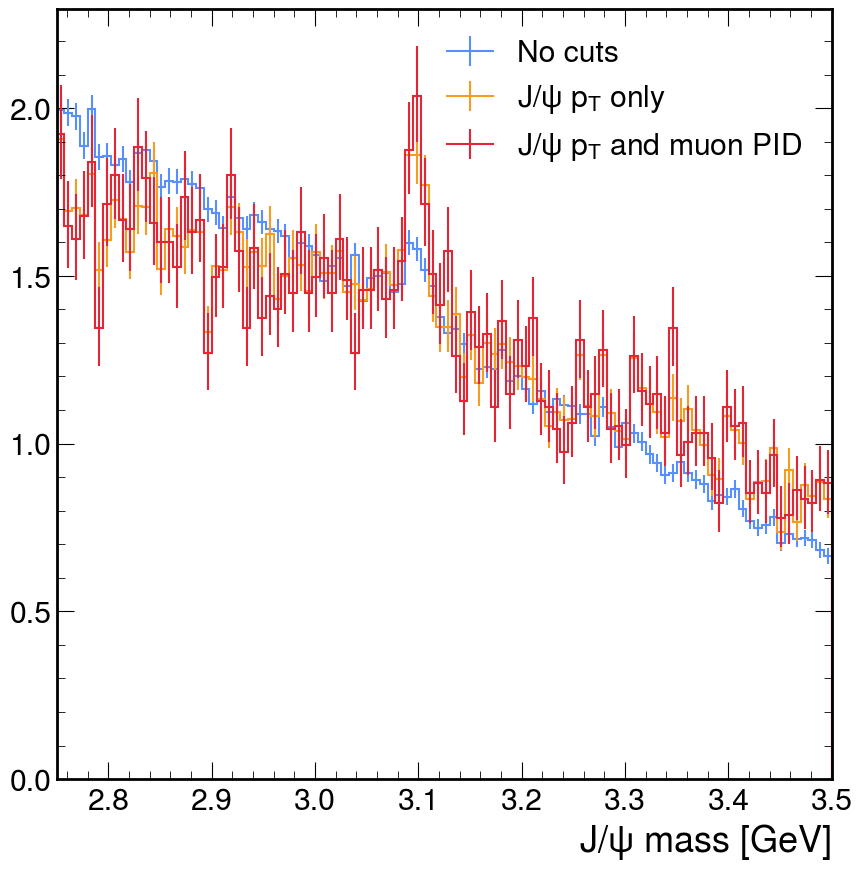

In [16]:
def plot_mass(df, **kwargs):
    h, bins = np.histogram(df['Jpsi_M'], bins=100, range=[2.75, 3.5])
    mplhep.histplot(h, bins, yerr=True, **kwargs)  # feel free to adjust
    # You can also use LaTeX in the axis label
    plt.xlabel('$J/\\psi$ mass [GeV]')
    plt.xlim(bins[0], bins[-1])


plot_mass(data_df, label='No cuts', density=1)
data_with_cuts_df = data_df.query('Jpsi_PT > 4')
plot_mass(data_with_cuts_df, label='$J/\\psi$ p$_T$ only', density=1)
data_with_cuts_df = data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))')
plot_mass(data_with_cuts_df, label='$J/\\psi$ p$_T$ and muon PID', density=1)
plt.legend(loc='best')

In [17]:
data_df.columns

Index(['Jpsi_PE', 'Jpsi_PX', 'Jpsi_PY', 'Jpsi_PZ', 'Jpsi_PT', 'Jpsi_P',
       'Jpsi_M', 'mum_PT', 'mum_PX', 'mum_PY', 'mum_PZ', 'mum_IP', 'mum_eta',
       'mum_M', 'mum_PE', 'mup_PT', 'mup_PX', 'mup_PY', 'mup_PZ', 'mup_IP',
       'mup_eta', 'mup_M', 'mup_PE', 'nTracks', 'mum_ProbNNmu', 'mum_ProbNNpi',
       'mup_ProbNNmu', 'mup_ProbNNpi', 'Jpsi_eta', 'mup_P', 'mum_P'],
      dtype='object')

In [18]:
"""
from python_lesson import check_truth

print('Originally the significance is')
check_truth(data_df)

print('\nCutting on pT gives us')
check_truth(data_df.query('Jpsi_PT > 4'))

print('\nCutting on pT and ProbNNmu gives us')
check_truth(data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))'))
"""

"\nfrom python_lesson import check_truth\n\nprint('Originally the significance is')\ncheck_truth(data_df)\n\nprint('\nCutting on pT gives us')\ncheck_truth(data_df.query('Jpsi_PT > 4'))\n\nprint('\nCutting on pT and ProbNNmu gives us')\ncheck_truth(data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))'))\n"

In [19]:
with uproot.open('https://starterkit.web.cern.ch/starterkit/data/advanced-python-2018/simulated_data.root') as mc_file:
    mc_df = mc_file['DecayTree'].arrays(library='pd')

# mc_file = uproot.open('https://starterkit.web.cern.ch/starterkit/data/advanced-python-2018/simulated_data.root')
# mc_df = mc_file['DecayTree'].arrays(library='pd')
mc_df.eval('Jpsi_eta = arctanh(Jpsi_PZ/Jpsi_P)', inplace=True)
mc_df.eval('mup_P = sqrt(mum_PX**2 + mum_PY**2 + mum_PZ**2)', inplace=True)
mc_df.eval('mum_P = sqrt(mum_PX**2 + mum_PY**2 + mum_PZ**2)', inplace=True)

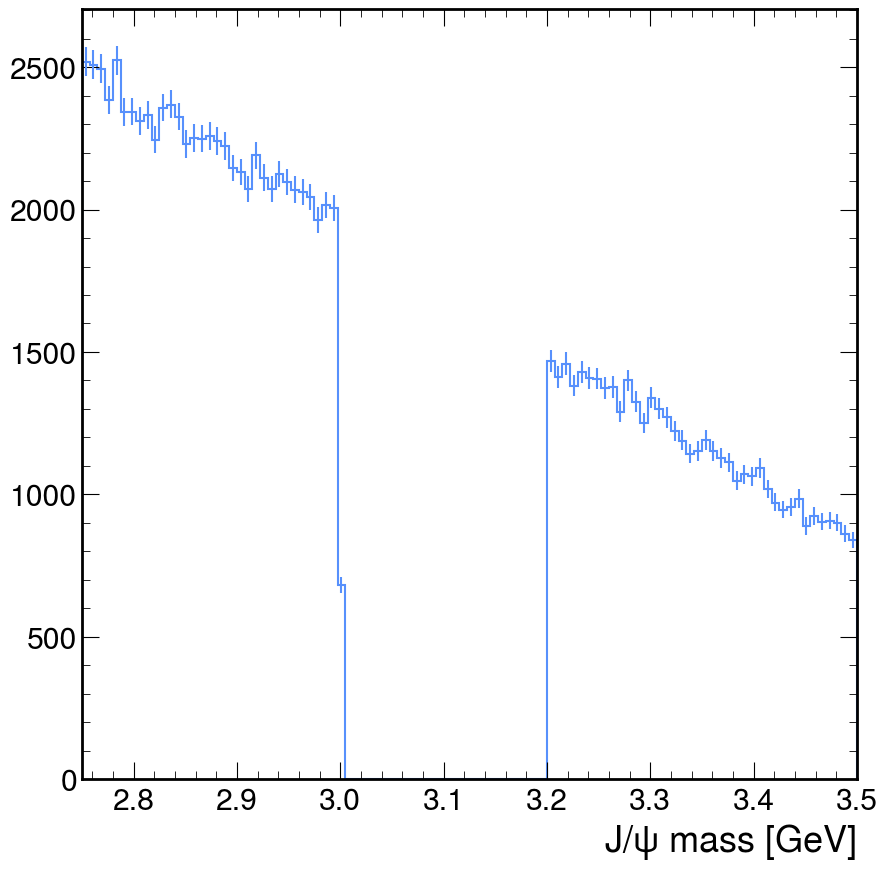

In [20]:
bkg_df = data_df.query('~(3.0 < Jpsi_M < 3.2)')
plot_mass(bkg_df)

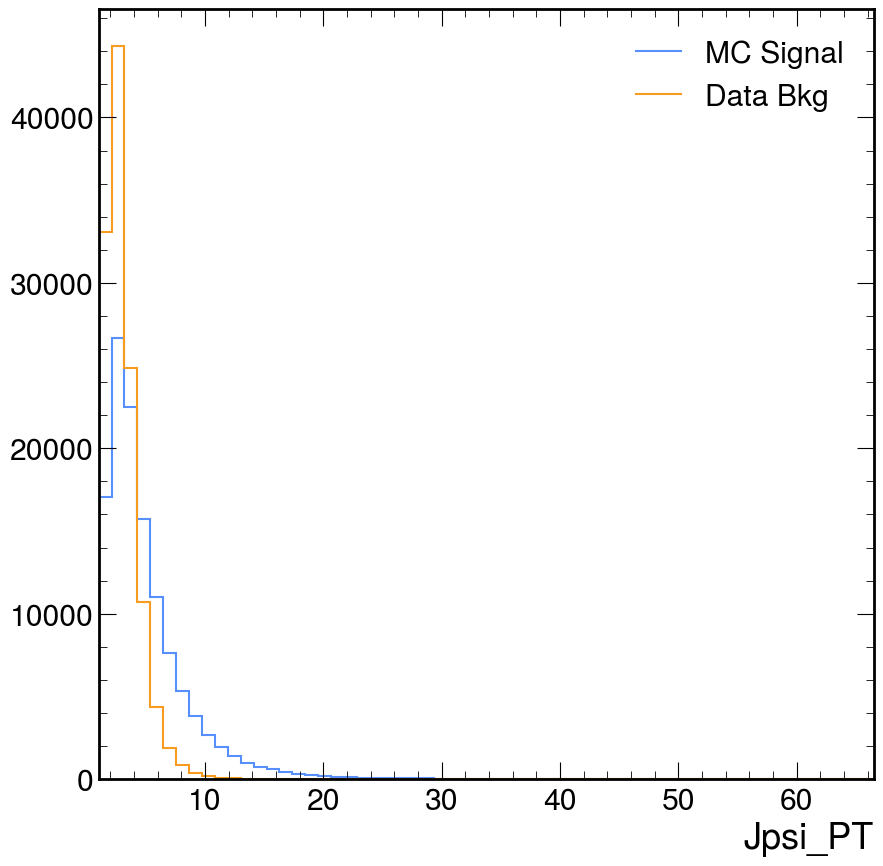

In [21]:
var = 'Jpsi_PT'
# let's first create the histograms
hsig, bins = np.histogram(mc_df[var], bins=60)
hbkg, bins = np.histogram(bkg_df[var], bins=bins)  # using the same bins here
# then plot them
mplhep.histplot((hsig, bins), label='MC Signal')
mplhep.histplot(hbkg, bins=bins, label='Data Bkg')
plt.xlabel(var)
plt.xlim(bins[0], bins[-1])
plt.legend(loc='best')

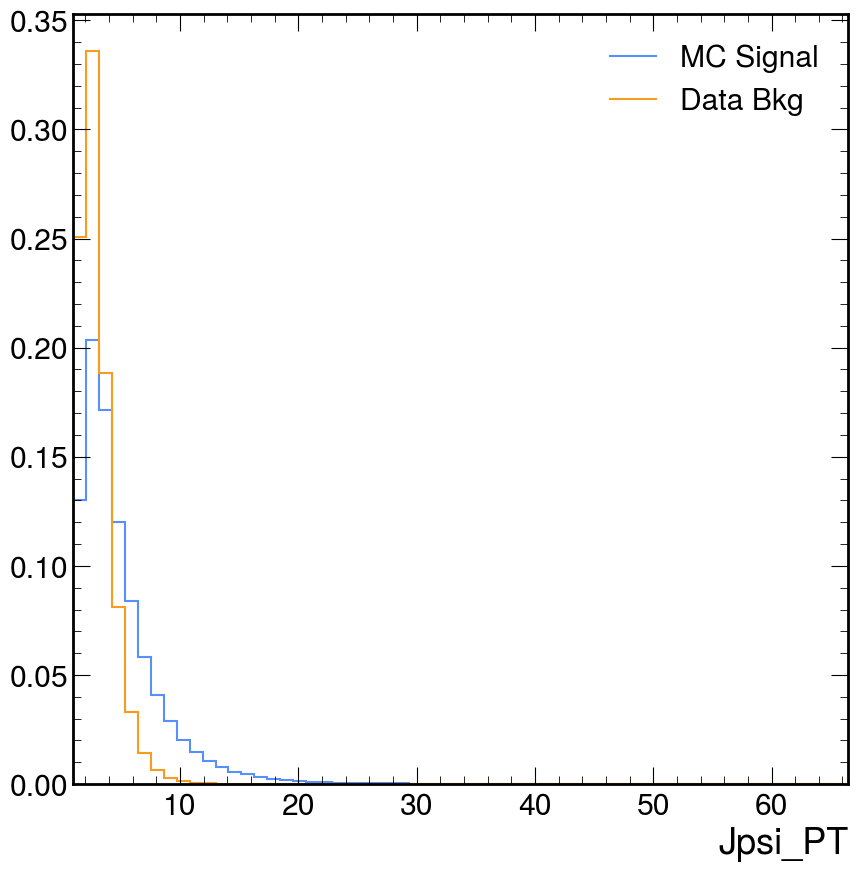

In [22]:
# Those are hard to compare!
# We can add the density keyword argument to normalise the distributions

mplhep.histplot(hsig, bins=bins, label='MC Signal', density=1)
mplhep.histplot(hbkg, bins=bins, label='Data Bkg', density=1)
plt.xlabel(var)
plt.xlim(bins[0], bins[-1])
plt.legend(loc='best')

In [23]:
def plot_comparision(var, mc_df, bkg_df):
    # create histograms
    hsig, bins = np.histogram(mc_df[var], bins=60, density=1)
    hbkg, bins = np.histogram(bkg_df[var], bins=bins, density=1)

    mplhep.histplot((hsig, bins), label='MC Signal', )
    mplhep.histplot(hbkg, bins=bins, label='Data Bkg')
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')

/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_76399/3447827755.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # creates a new figure


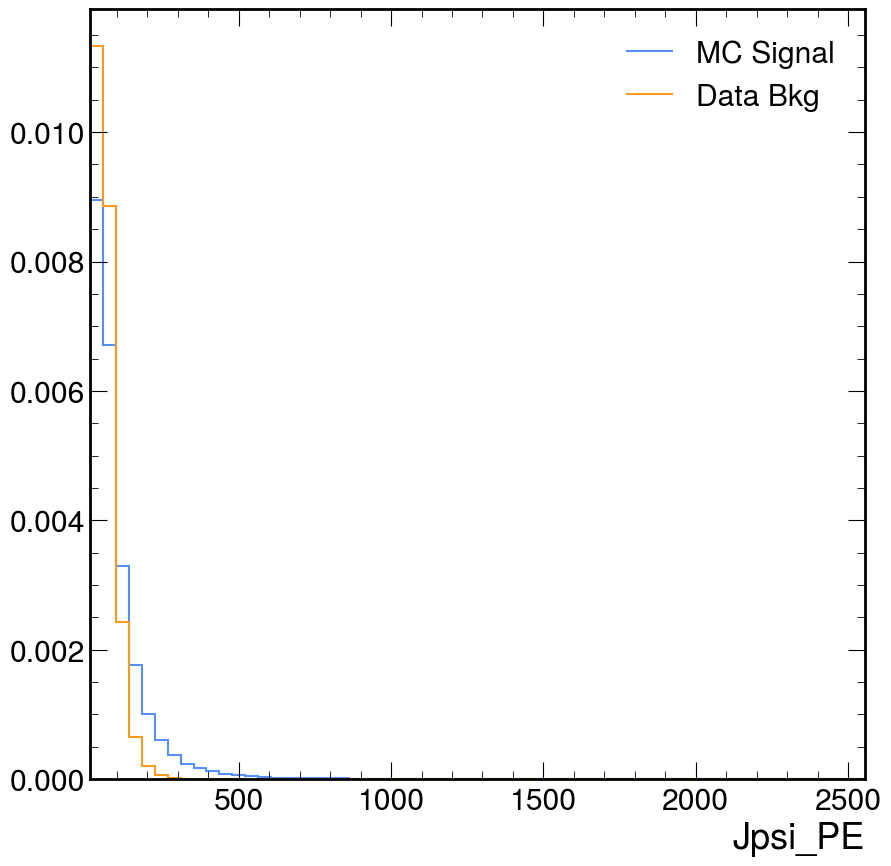

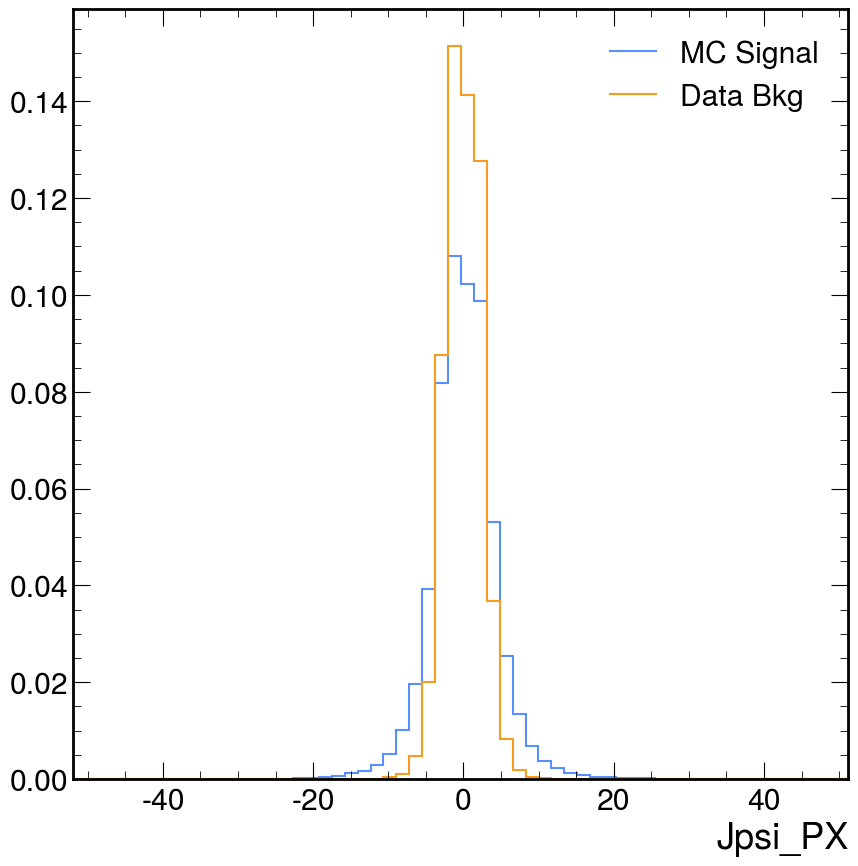

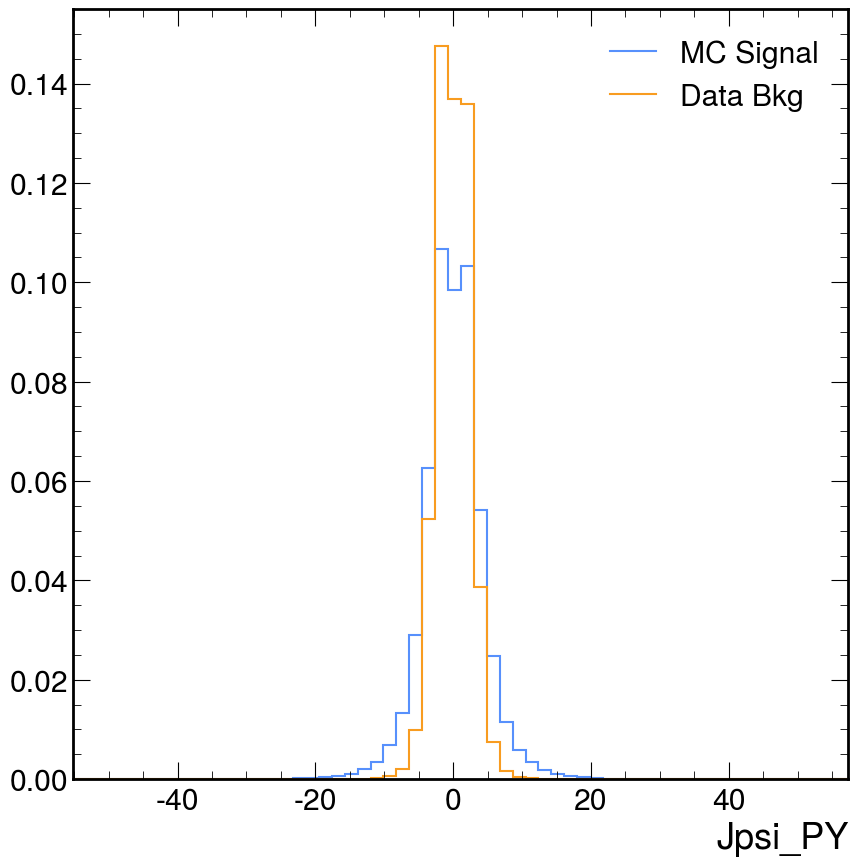

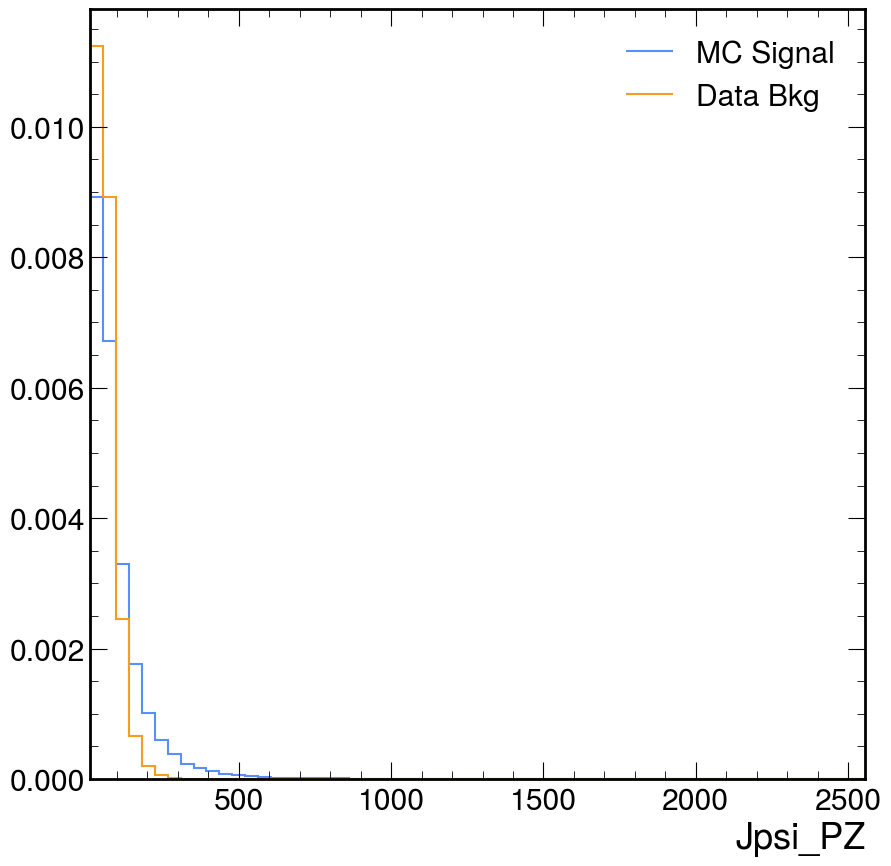

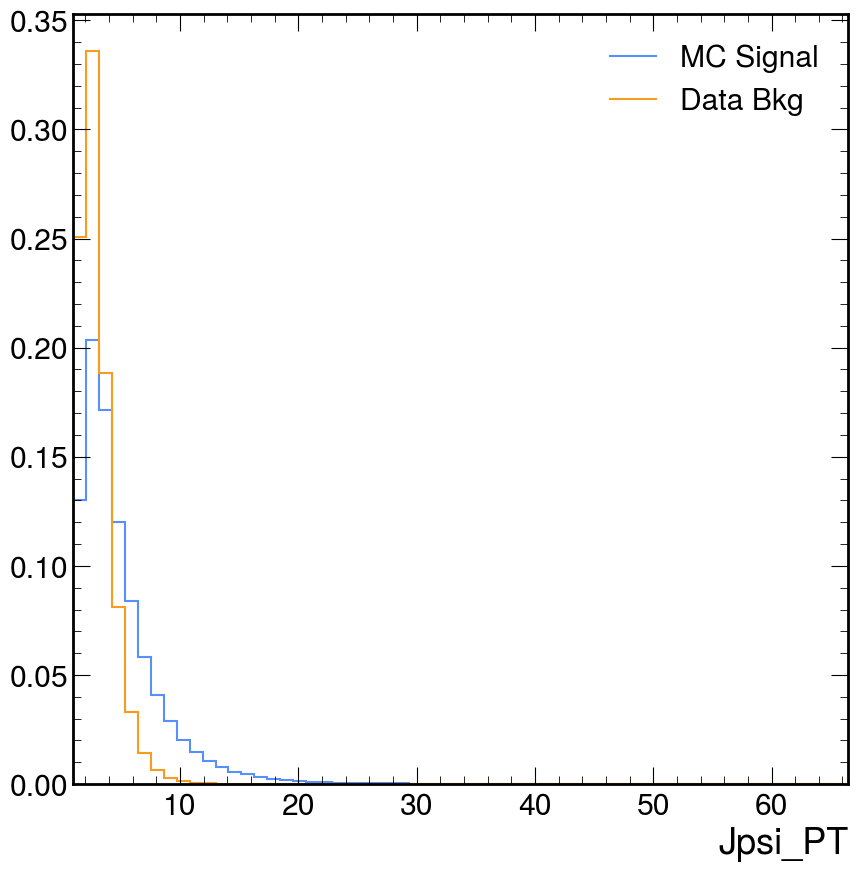

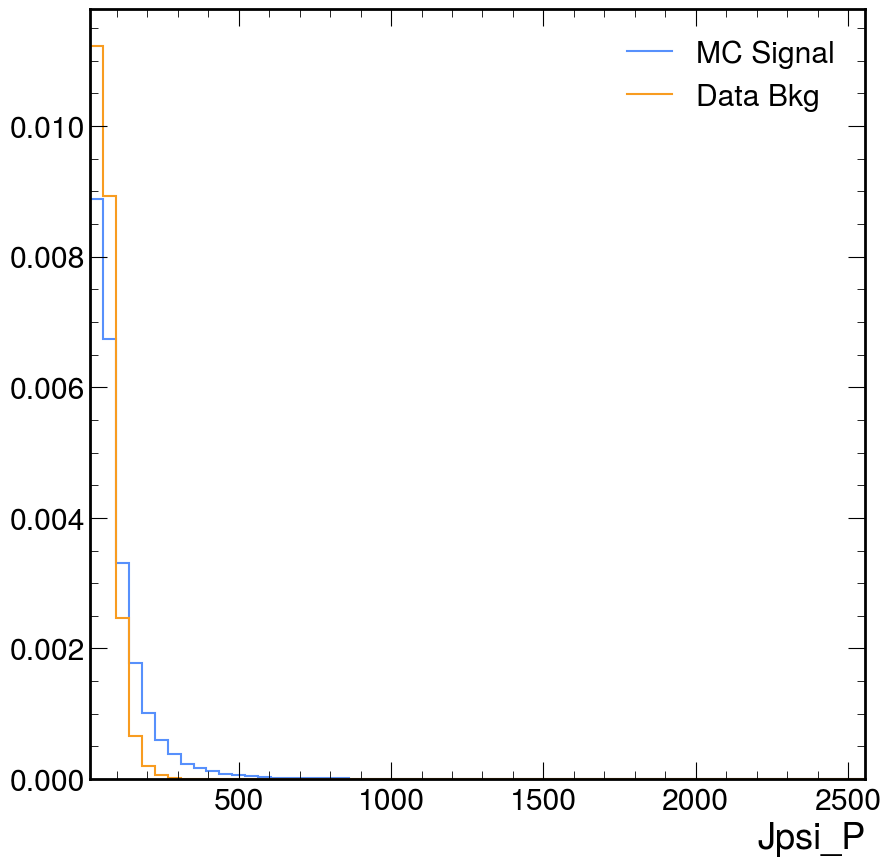

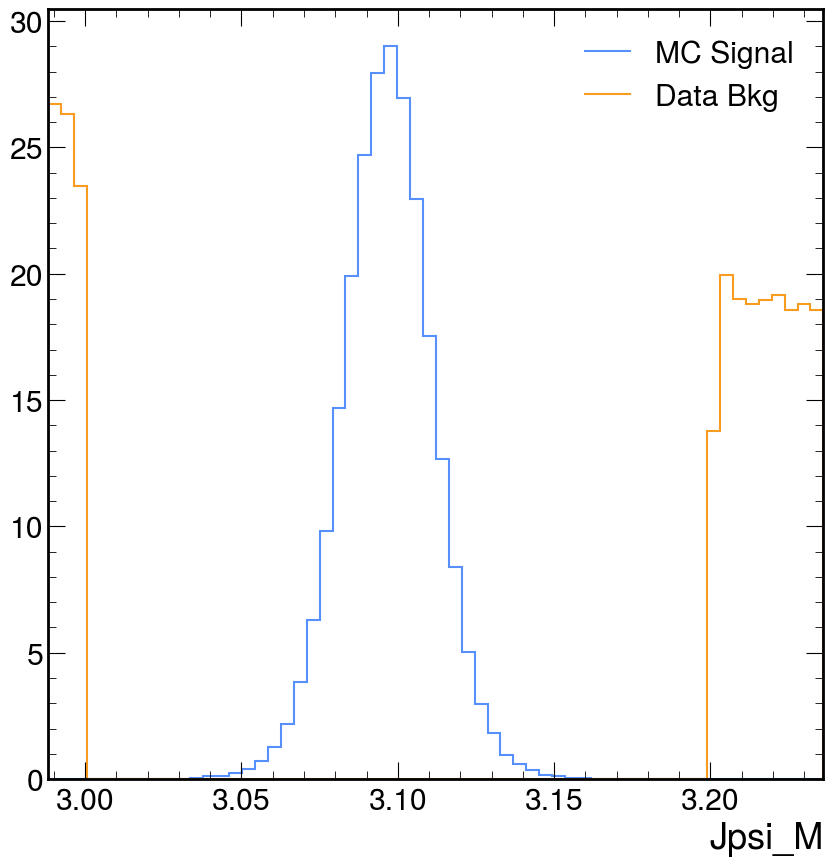

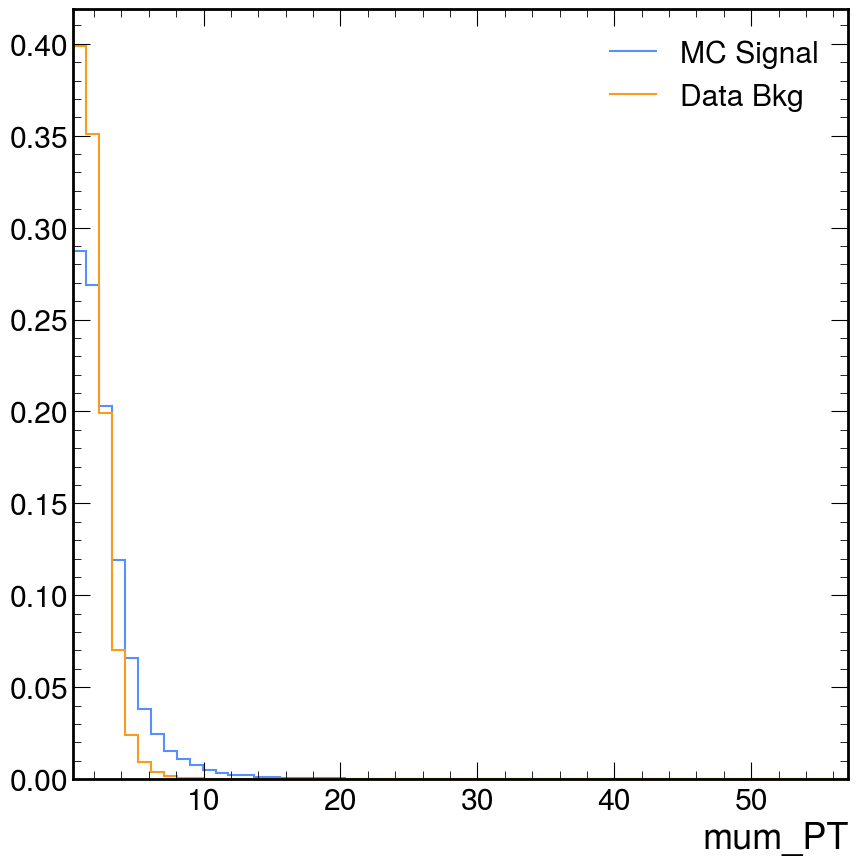

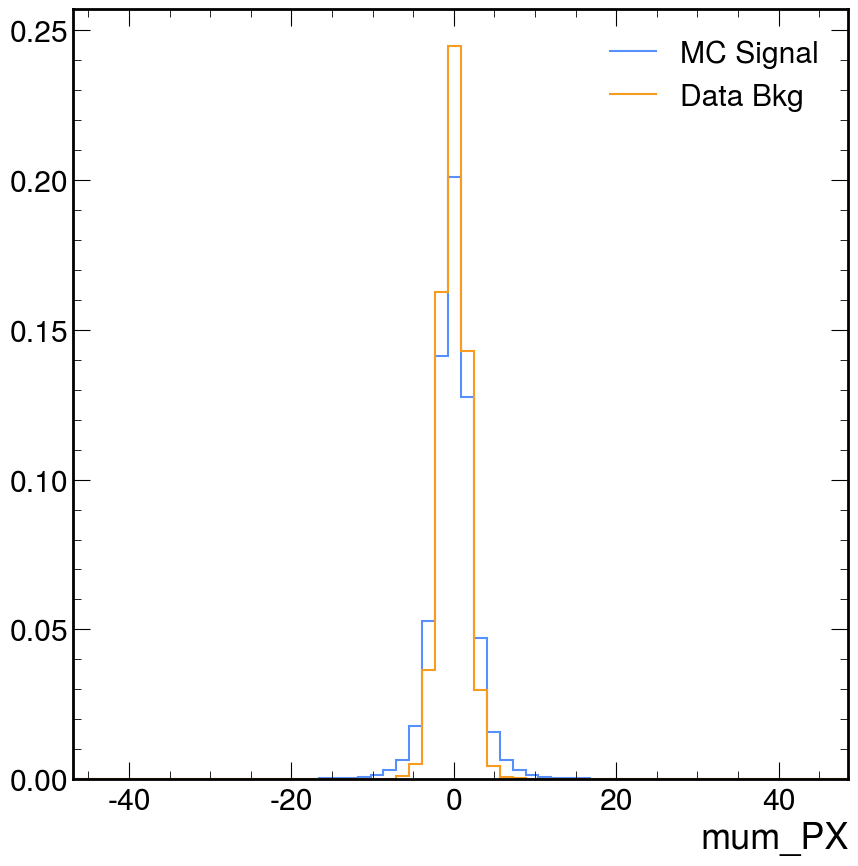

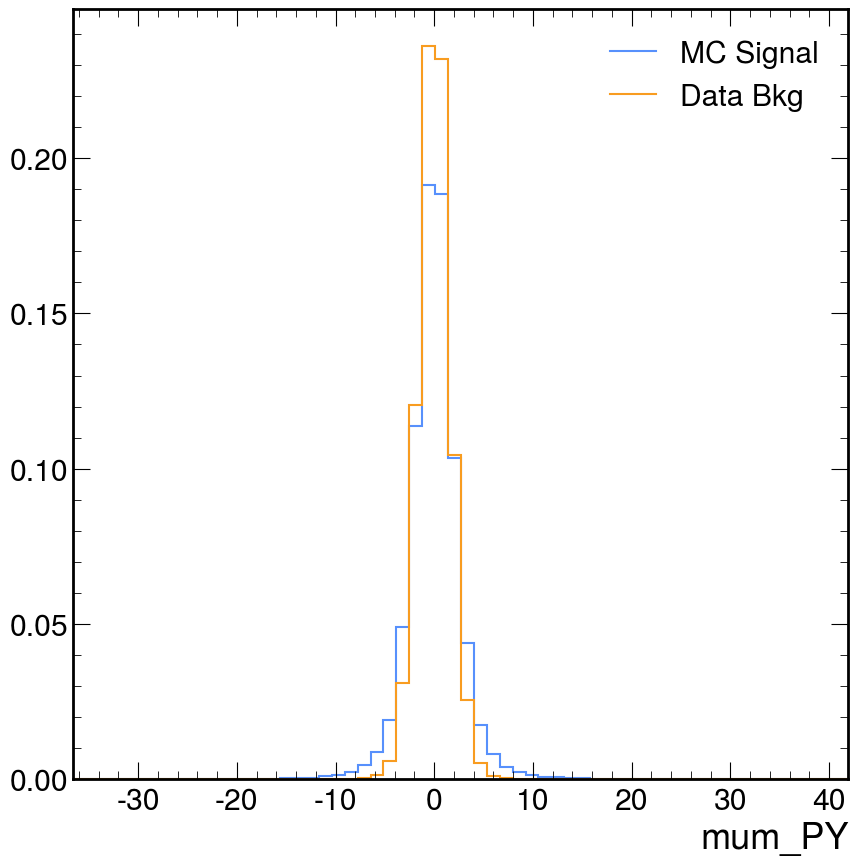

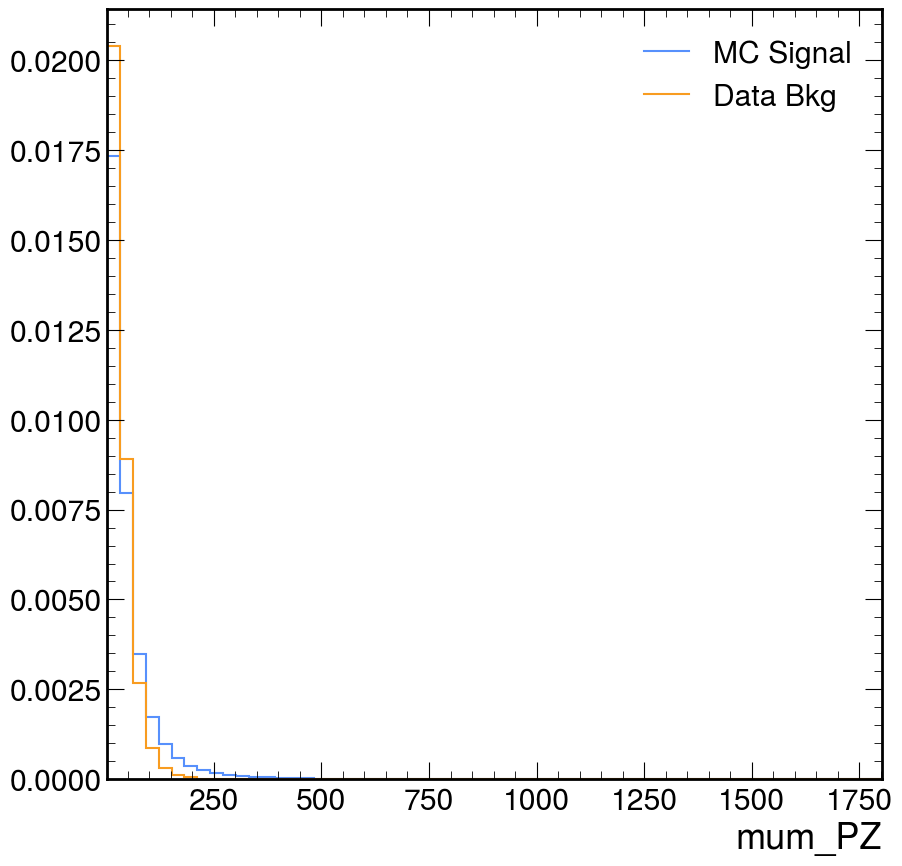

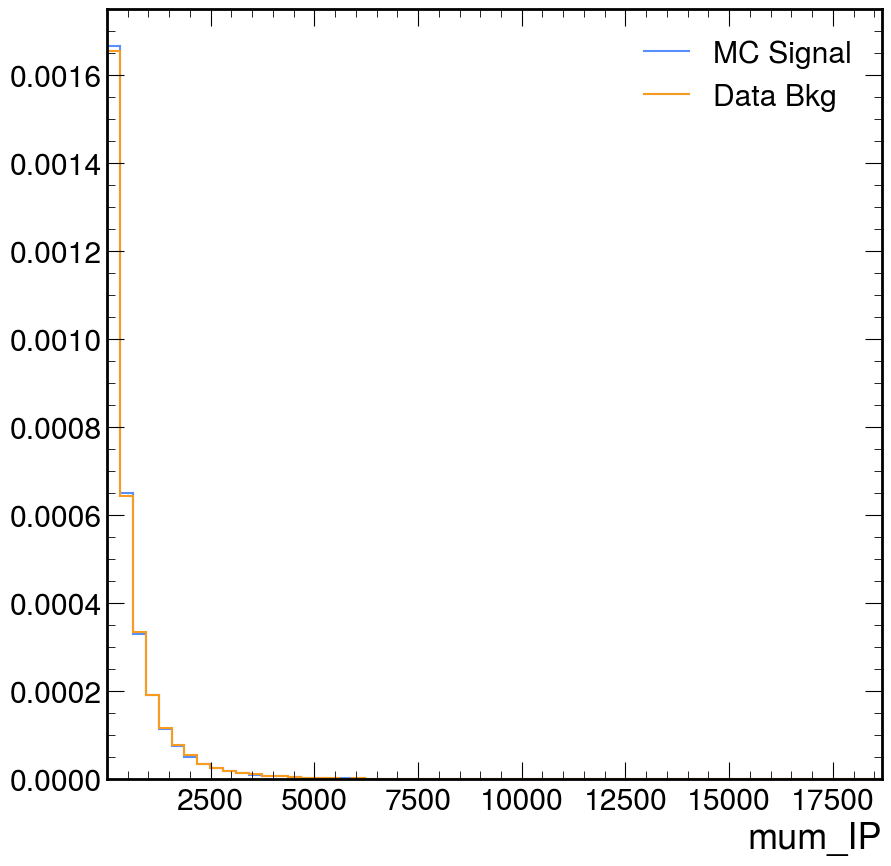

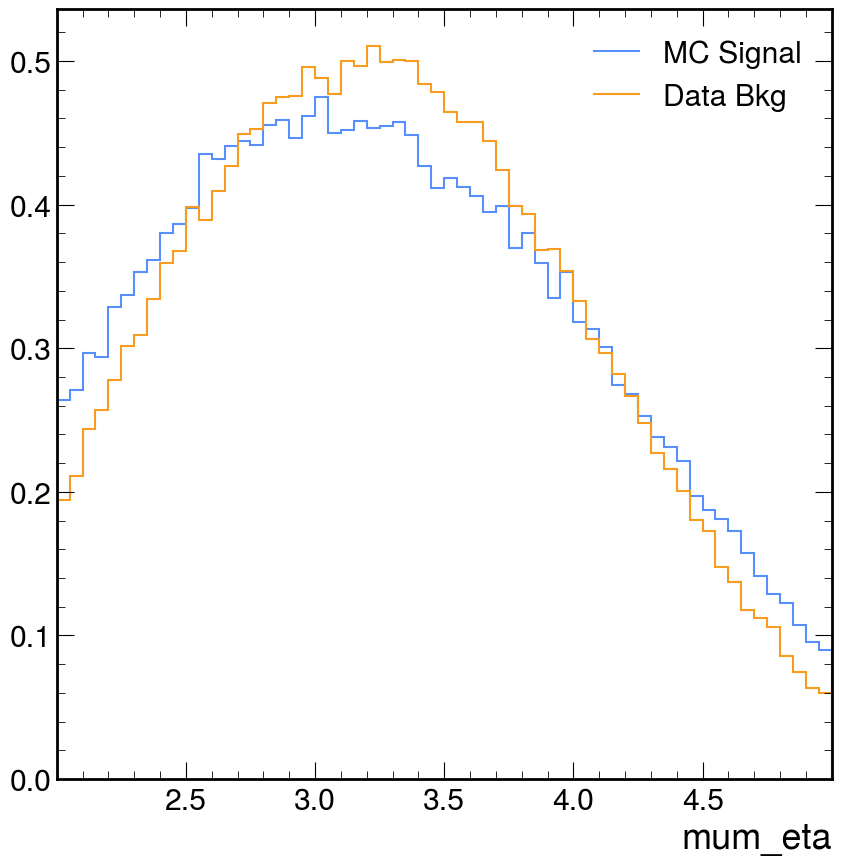

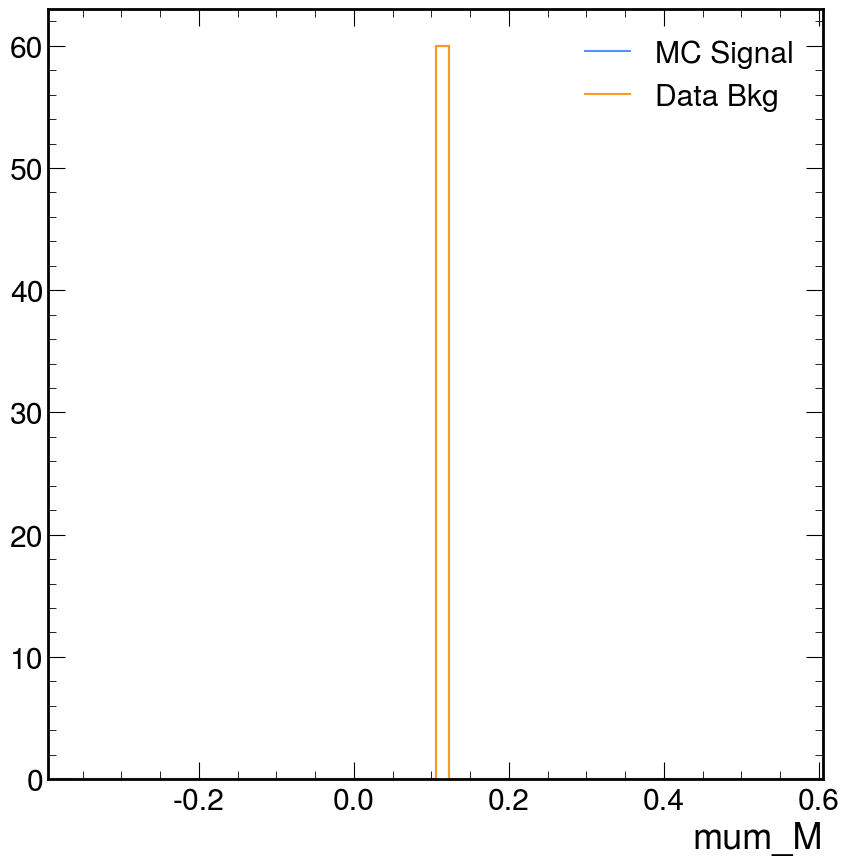

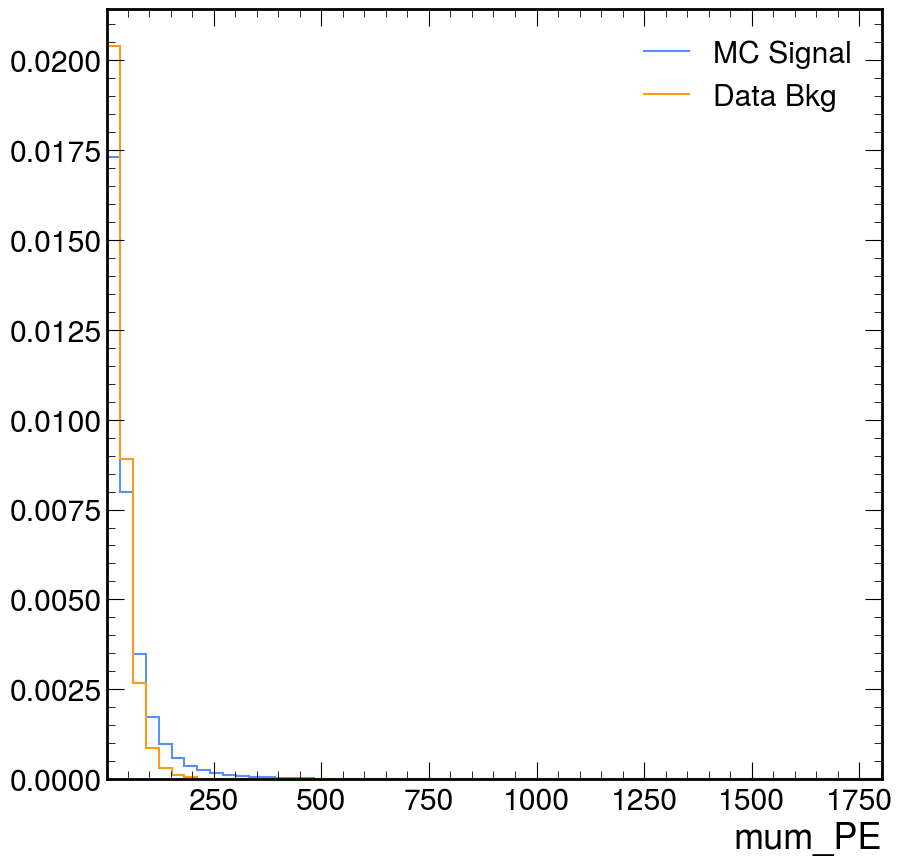

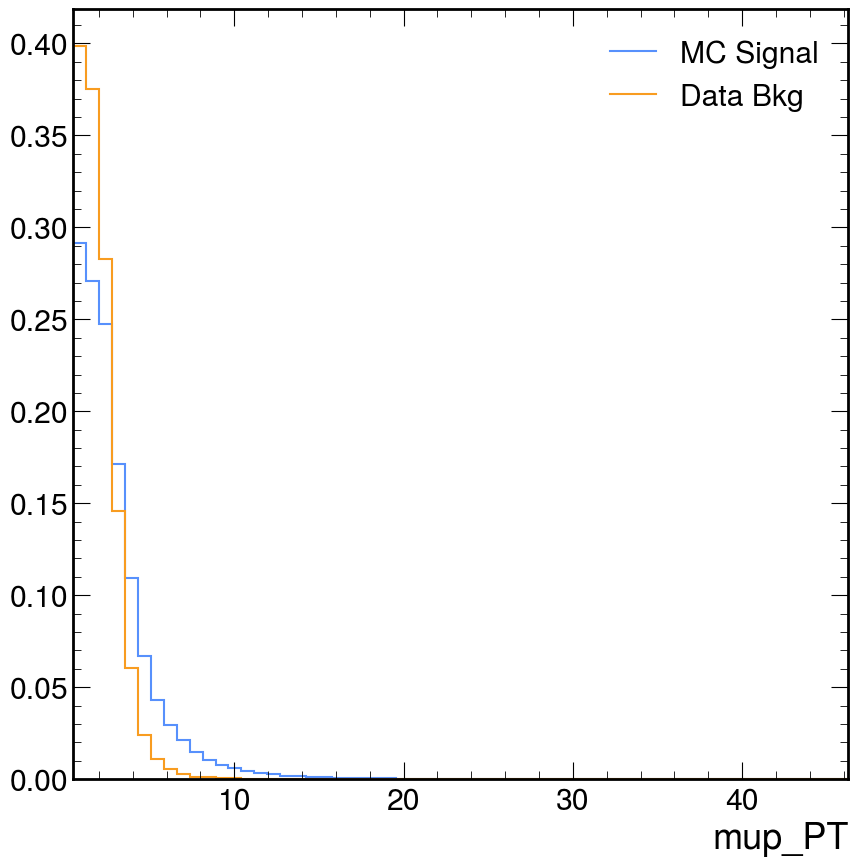

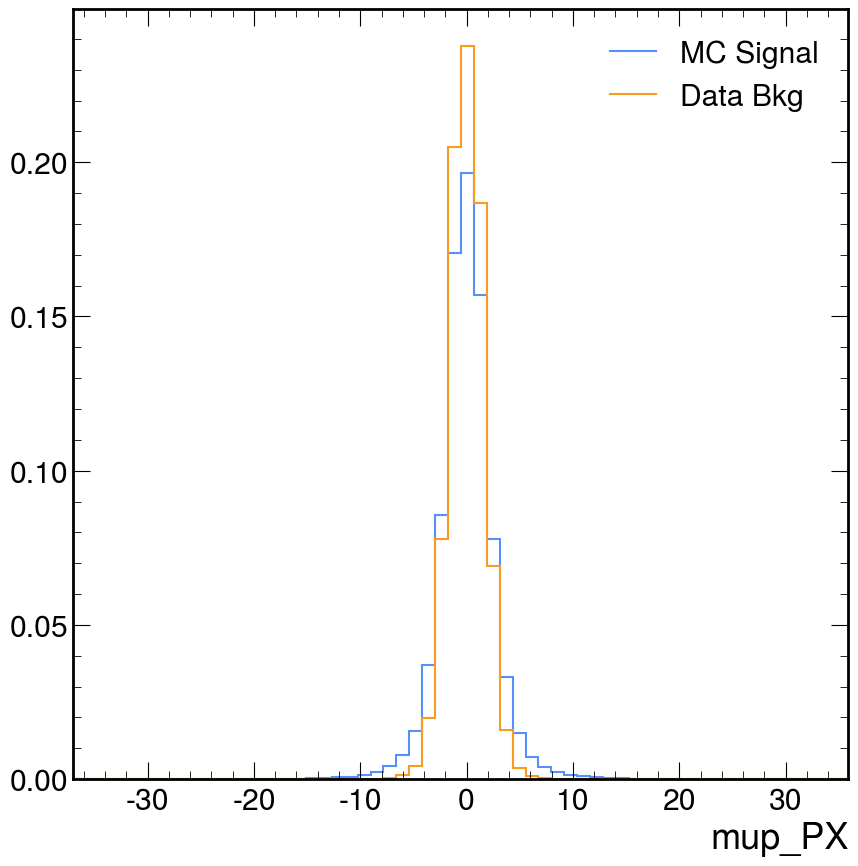

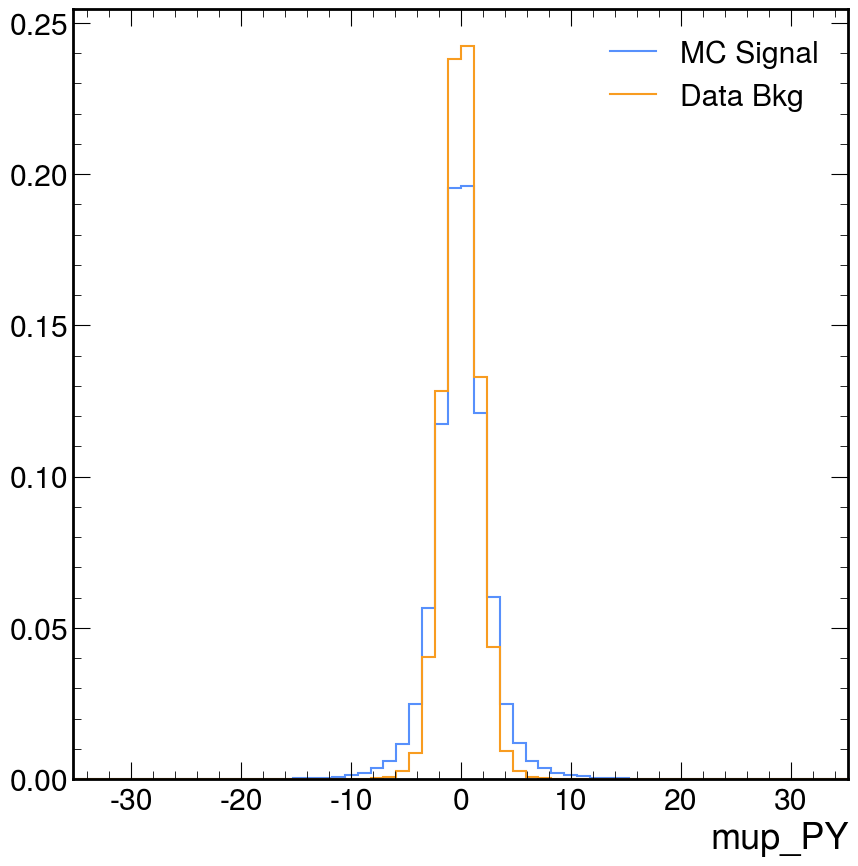

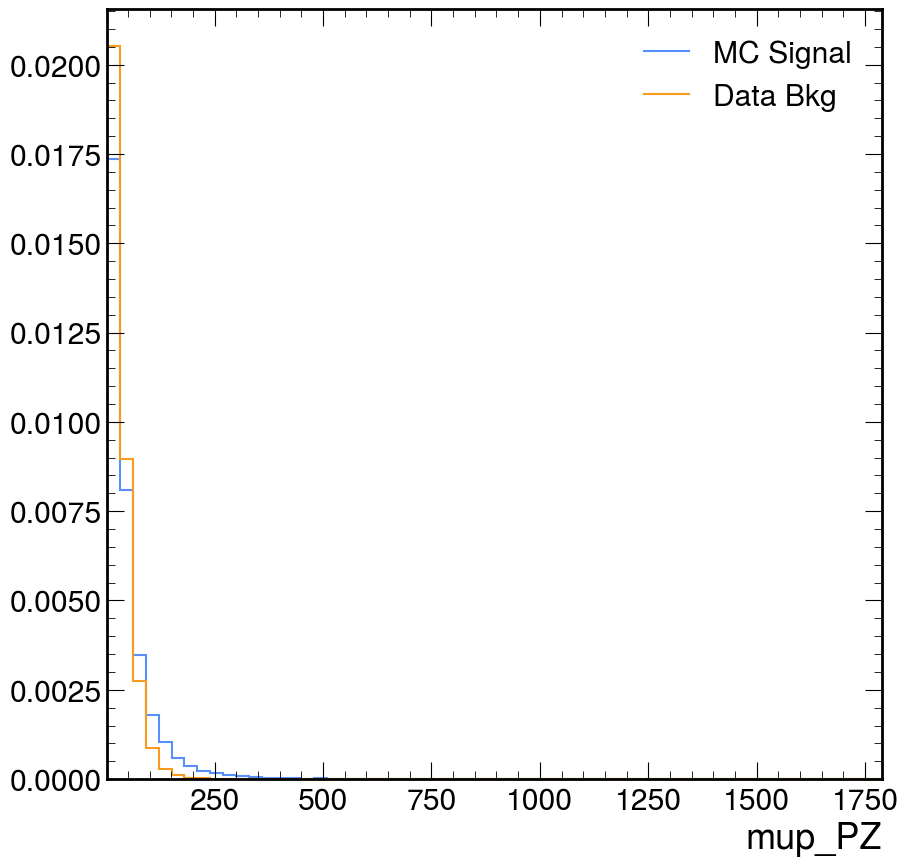

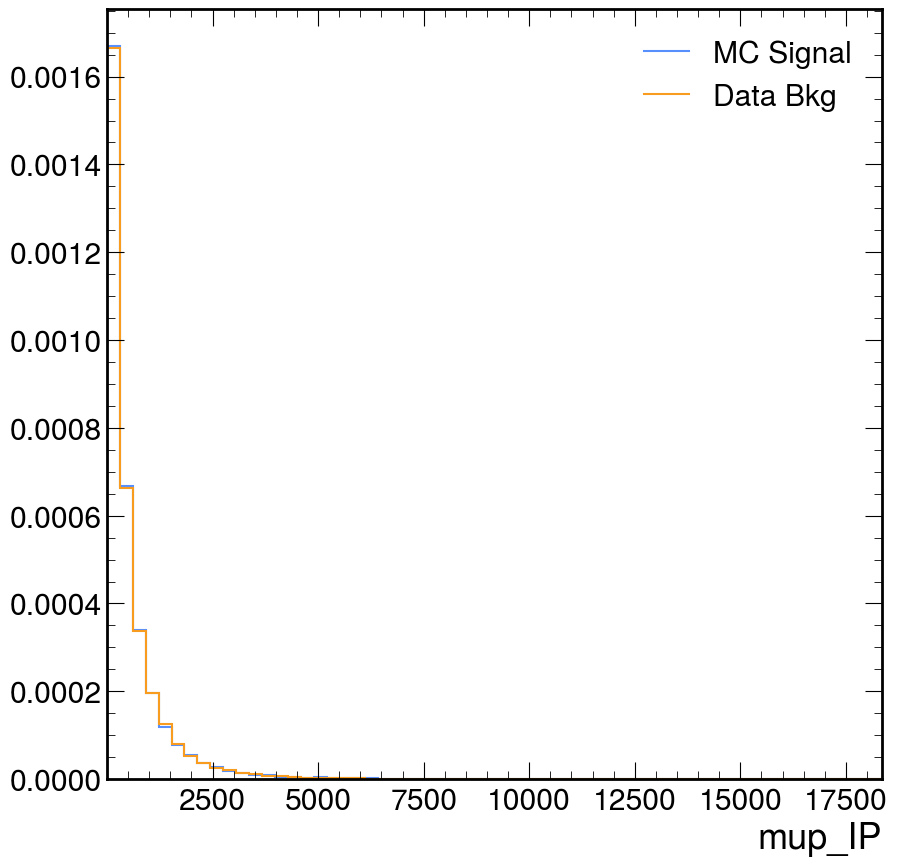

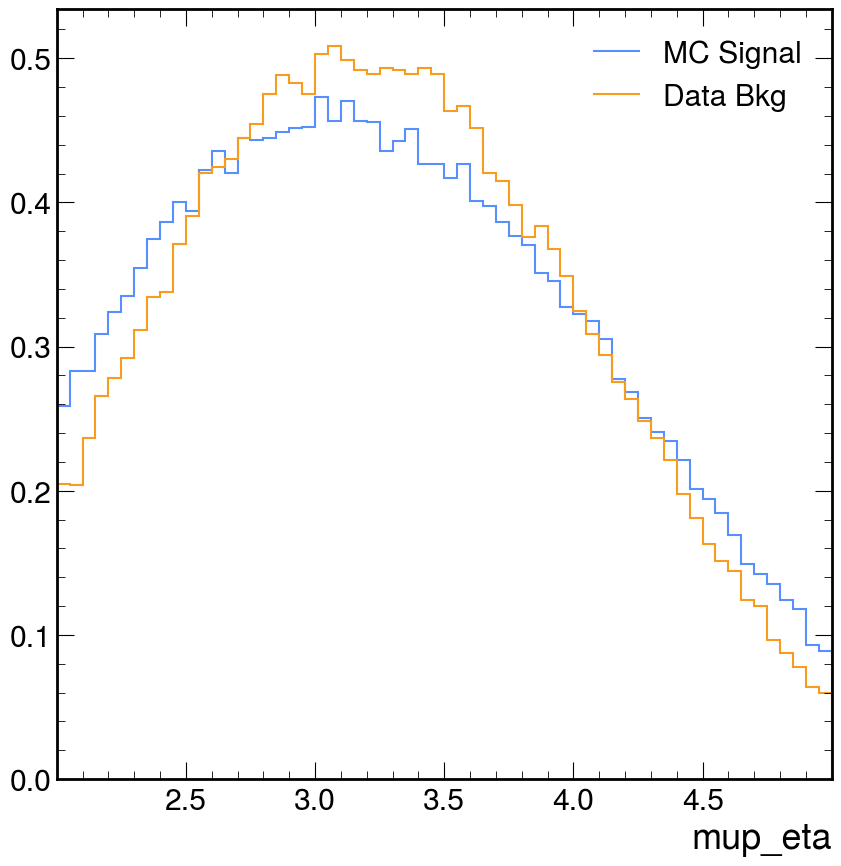

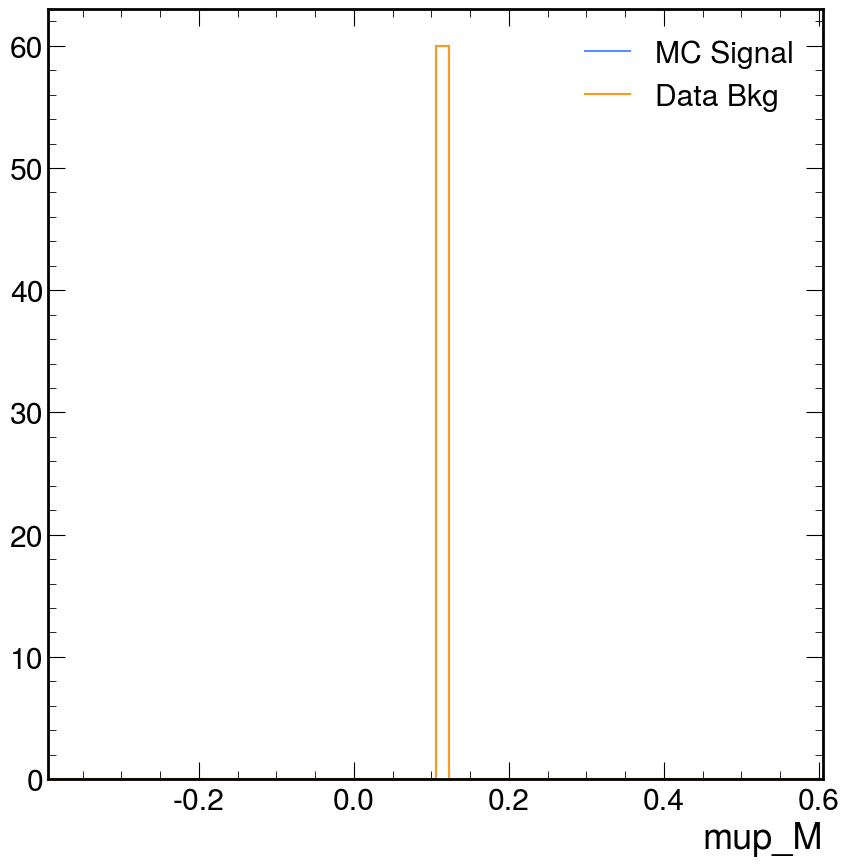

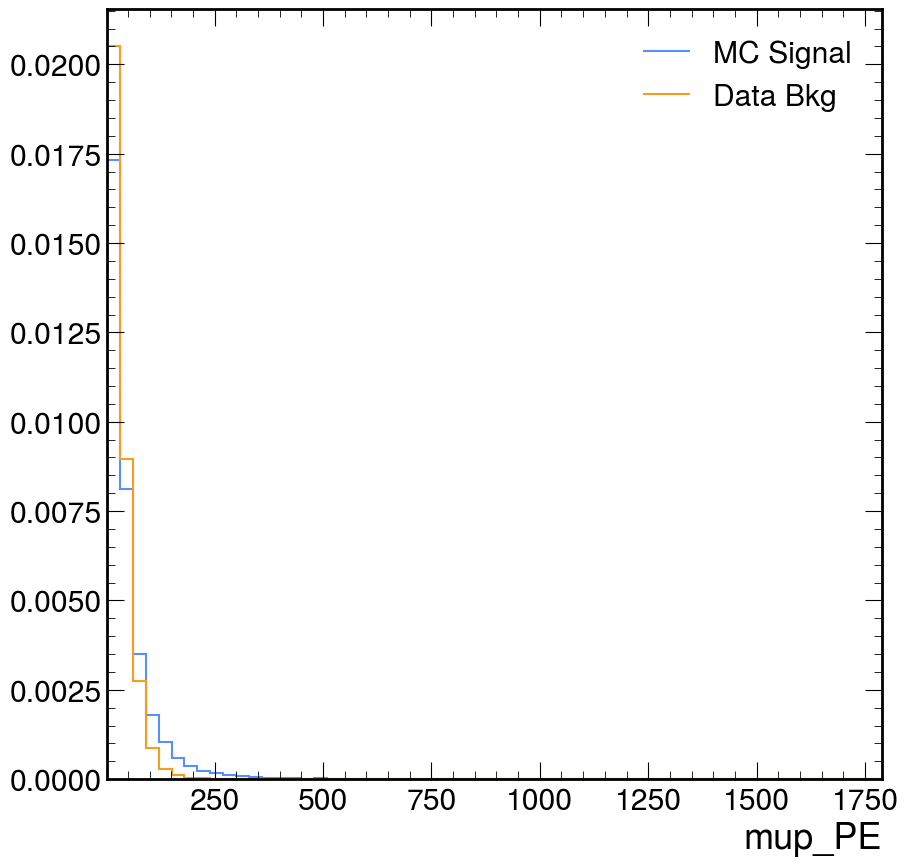

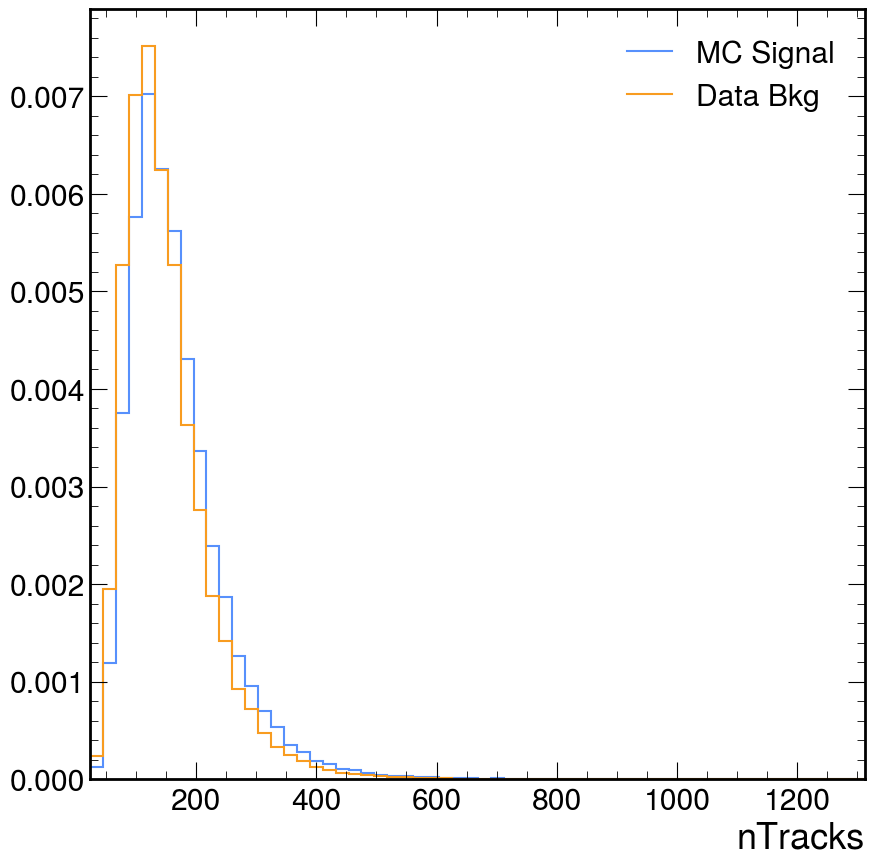

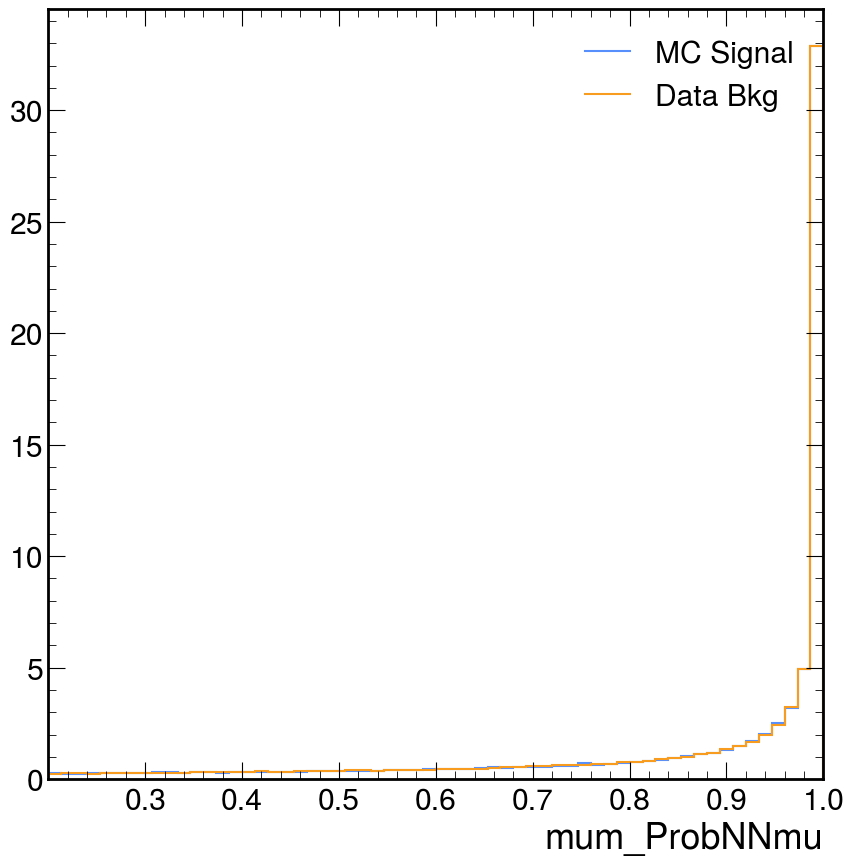

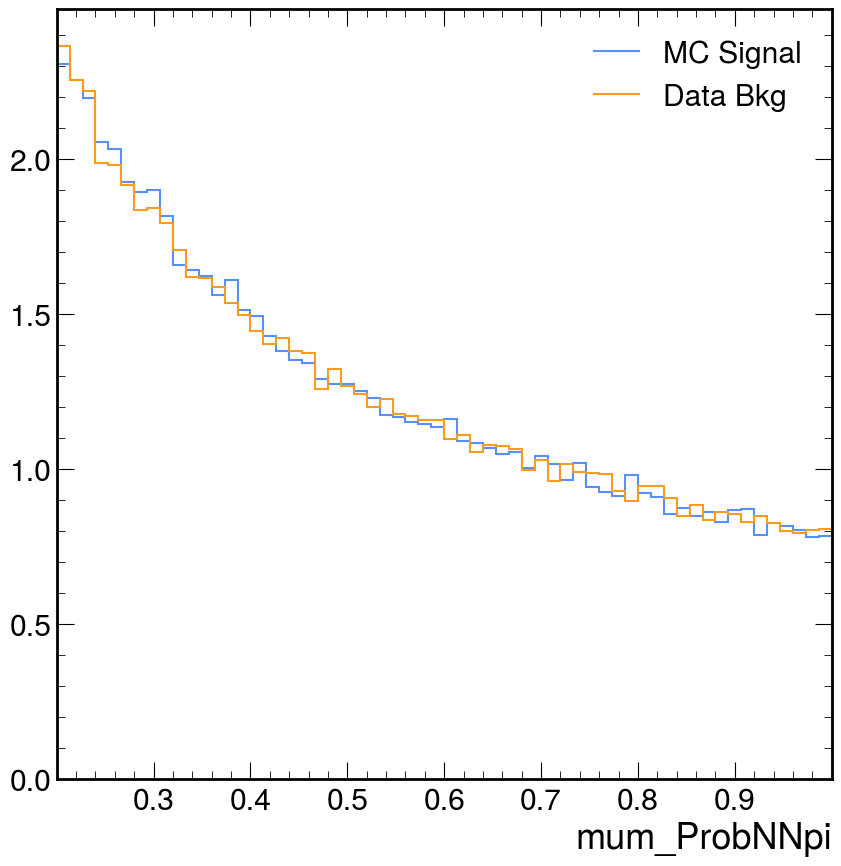

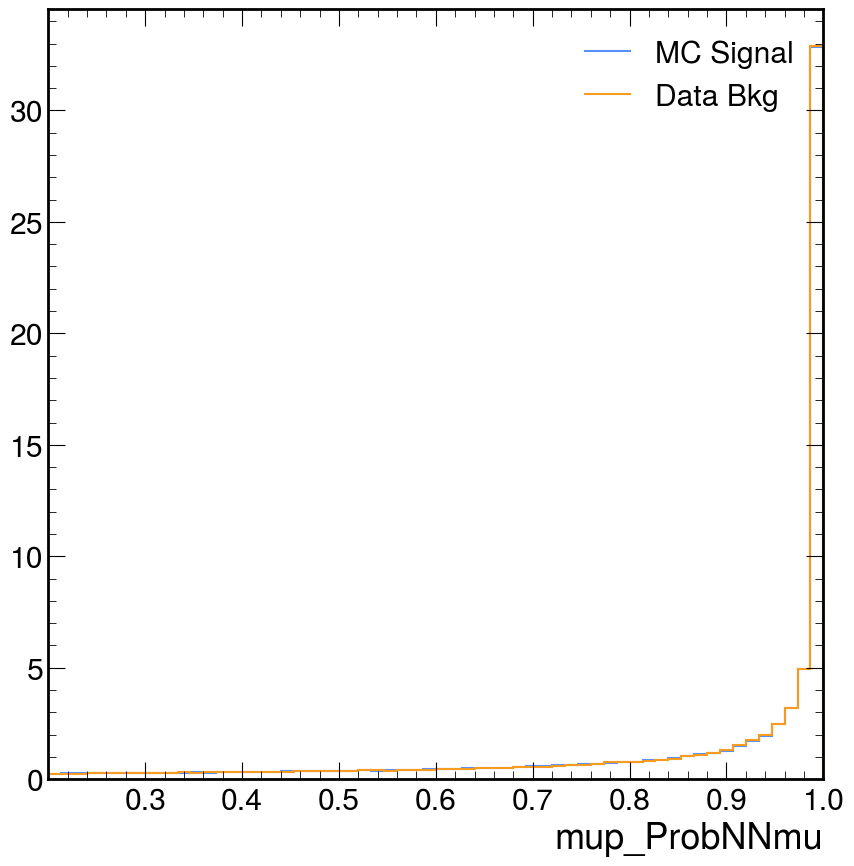

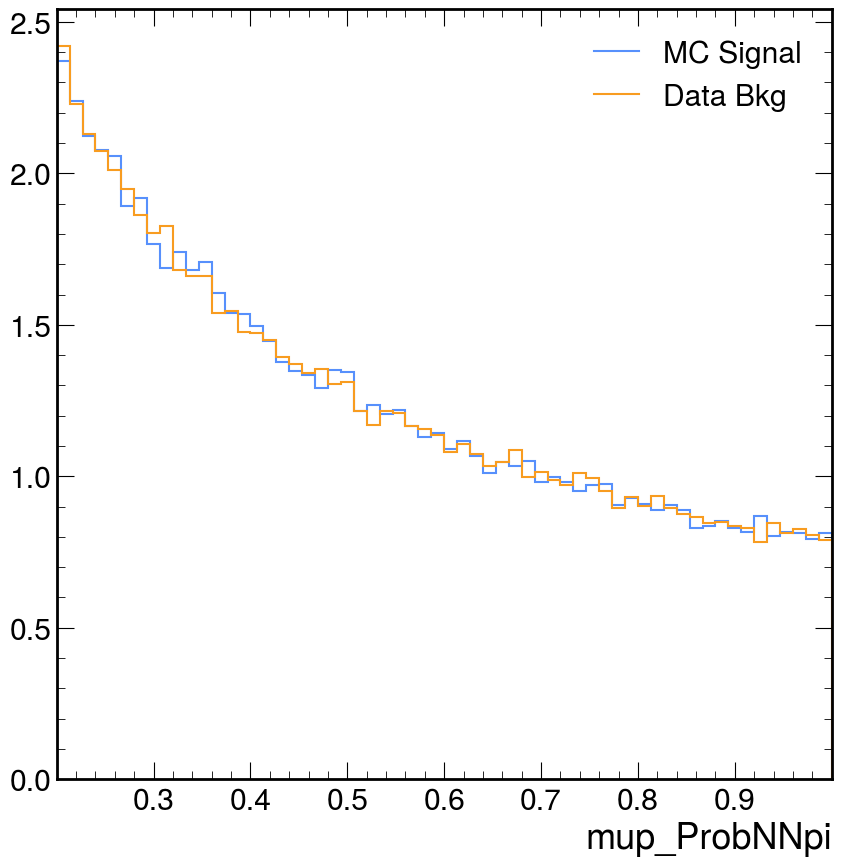

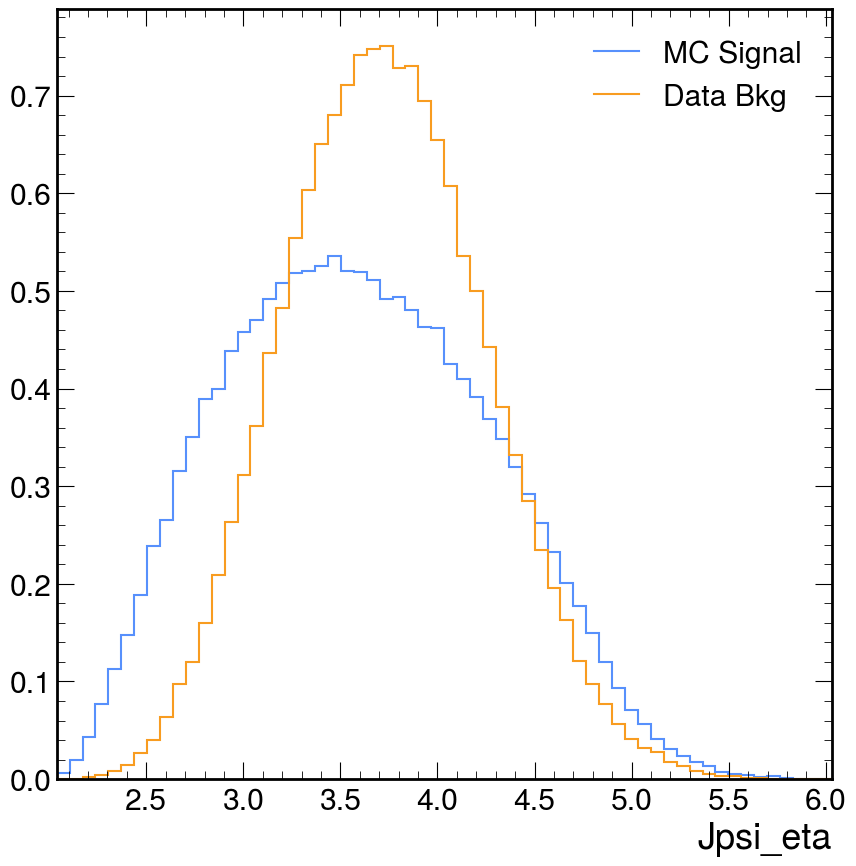

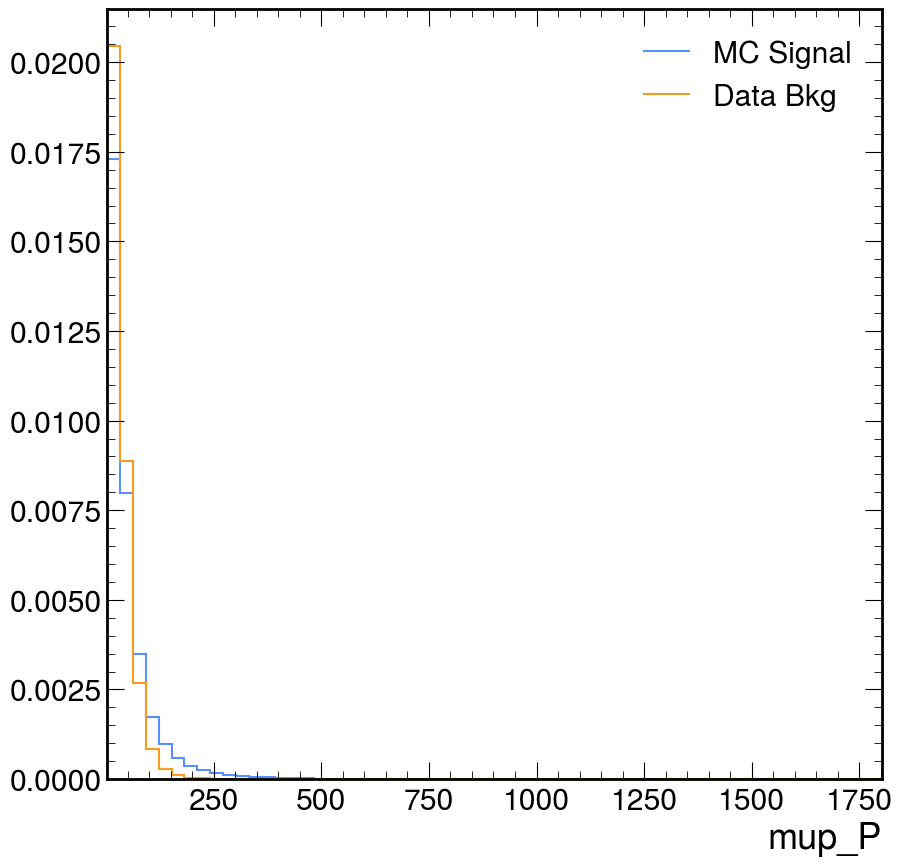

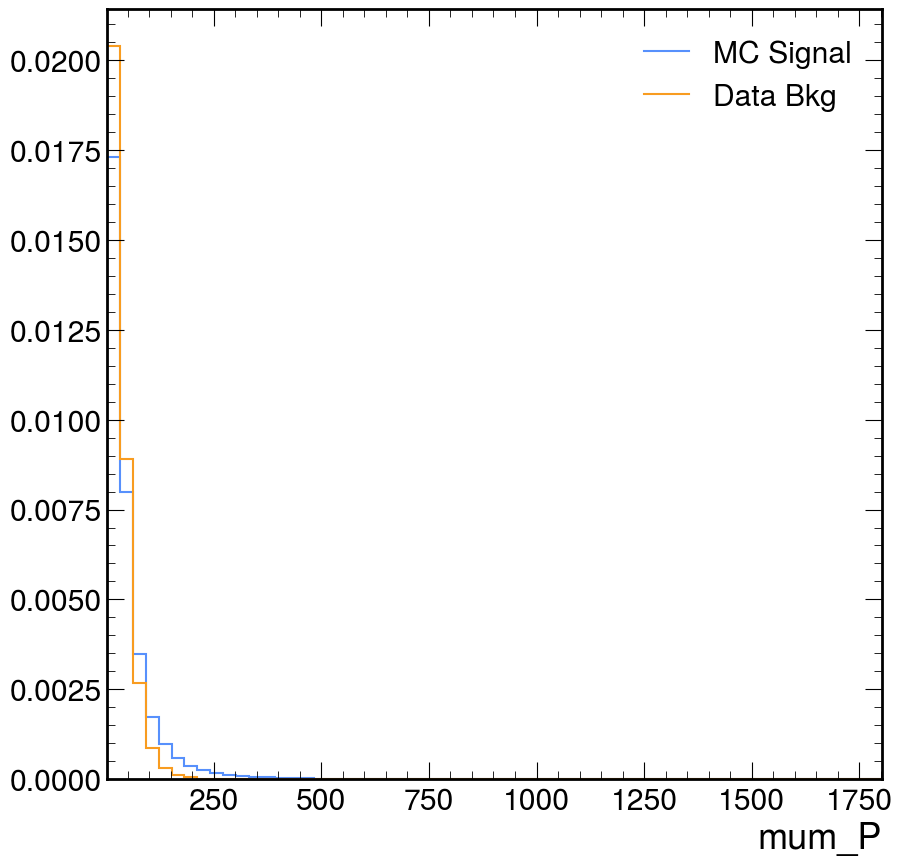

In [24]:
for var in data_df.columns:
    plt.figure()  # creates a new figure
    plot_comparision(var, mc_df, bkg_df)